# K-Means
The normalized automobile distributor timing speed and ignition coil gaps for production F-150 trucks over the years of 1996, 1999, 2006, 2015, and 2022. We have stripped out the labels for the five years of data.

Each sample in the dataset is two-dimensional, i.e. $\textbf{x}_i \in \mathbb{R}^2$ (one dimension for timing speed and the other for coil gaps), and there are $N=5000$ instances in the data.

## Question 1
**Question 1a.)** Implement a simple k-means algorithm in Python on Colab with the following initialization:
\begin{equation}
\textbf{x}_1 = \left( \begin{matrix} 10 \\ 10 \end{matrix} \right), \textbf{x}_2 = \left( \begin{matrix} -10 \\ -10 \end{matrix} \right),
\textbf{x}_3 = \left( \begin{matrix} 2 \\ 2 \end{matrix} \right),
\textbf{x}_4 = \left( \begin{matrix} 3 \\ 3 \end{matrix} \right),
\textbf{x}_5 = \left( \begin{matrix} -3 \\ -3 \end{matrix} \right),
\nonumber
\end{equation} \\
You need only 100 iterations, maximum, and your algorithm should run very quickly to get the results.

In [1]:
# import statements
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [2]:
# load the data
data = np.loadtxt('data/f150_motor_distributors.txt', delimiter=',')

centroids = np.array([[10, 10], [-10, -10], [2, 2], [3, 3], [-3, -3]])

# run 100 iterations of k-means
for i in range(100):
    distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
    labels = np.argmin(distances, axis=0)
    centroids = np.array([data[labels == j].mean(axis=0) for j in range(centroids.shape[0])])

**Question 1b.)** Scatter the results in two dimensions with different clusters as different colors.

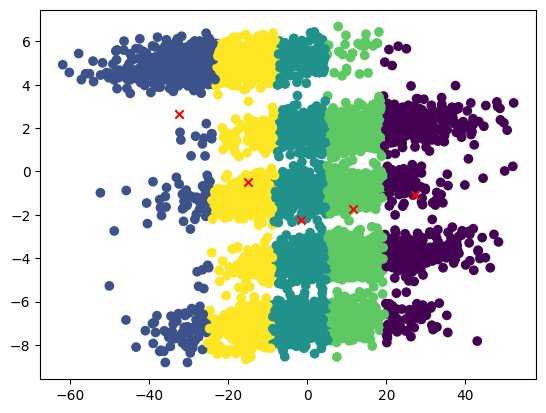

In [3]:
plt.scatter(data[:, 0], data[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
plt.show()

**Question 1c.)** You will notice that in the above, there are only five initialization clusters. Why is k = 5 a logical choice for this dataset? After plotting your resulting clusters, what do you notice? Did it cluster very well? Is there an initialization that would make it cluster well?

**Answer:** Based on the scatter plot of the data, it is clear that the data points naturally form five distinct clusters. However, the k-means algorithm with the given initialization does not cluster the data very well. The two dimensions are clearly not independent and may have different variances. Thus, I do not believe there is an initialization that would make it cluster well.

## Question 2
In the data from Question 1, let $\textbf{x}$ and $\textbf{y}$ be two instances, i.e., they are each truck with separate measurements.  A common distance metric is the *Mahalanobis Distance* with a specialized matrix $P \in \mathbb{R}^{2 \times 2}$ that is written as follows: 

\begin{equation}
    R = (P^T P)^{-1}
\end{equation}

\begin{equation}
    d(\textbf{x}, \textbf{y}) = \sum_{i=1}^2 \sum_{j=1}^2 (x_i - y_i) \cdot R_{i,j} \cdot (x_j - y_j)
    \nonumber
\end{equation}

In scalar format (non-matrix format), the Mahalanobis Distance can be expressed as:

\begin{equation}
    d(\textbf{x}, \textbf{y}) = \sum_{i=1}^2 \sum_{j=1}^2 (x_i - y_i) \cdot R_{i,j} \cdot (x_j - y_j)
    \nonumber
\end{equation}

where $\textbf{x}$ and $\textbf{y}$ are two instances of dimensionality 2, and $d(\textbf{x}, \textbf{y})$ is the distance between them. In the case of the F150 engine components, $P$ is a known relationship through Ford's quality control analysis each year, where it is numerically shown as below:

\begin{equation}
 P = \left(
\begin{matrix}
10 & 0.5 \\
-10 & 0.25
\end{matrix}
\right) \nonumber
\end{equation}

**Question 2a.)** Using the same data as **Question 1** and the same initialization instances $\{\textbf{x}_1, \textbf{x}_2, \textbf{x}_3, \textbf{x}_4, \textbf{x}_5 \}$ implement a specialized $k$-means with the above Mahalanobis Distance. Scatter the results with the different clusters as different colors.

In [4]:
P = np.array([[10, 0.5], [-10, 0.25]])
R = np.linalg.inv(P.T @ P)

def mahalanobis_distance(x, y):
    return (x - y).T @ R @ (x - y)

centroids = np.array([[10, 10], [-10, -10], [2, 2], [3, 3], [-3, -3]])

for i in range(100):
    distances = np.zeros((centroids.shape[0], data.shape[0]))
    for j in range(centroids.shape[0]):
        distances[j] = np.apply_along_axis(mahalanobis_distance, 1, data, centroids[j])
    labels = np.argmin(distances, axis=0)
    centroids = np.array([data[labels == j].mean(axis=0) for j in range(centroids.shape[0])])

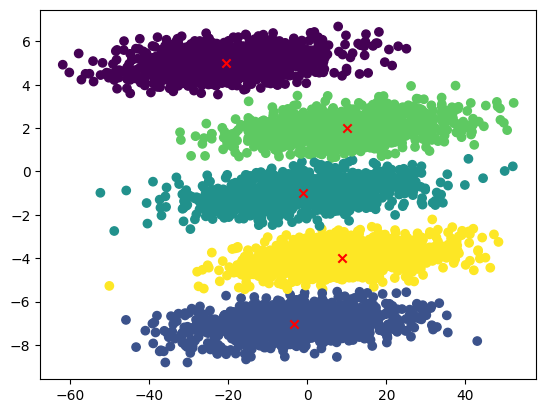

In [5]:
plt.scatter(data[:, 0], data[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
plt.show()

Using the mahalanobis distance obviously makes it clutter well. 

**Question 2b.)** Calculate and print out the principle components of the aggregate data.

In [6]:
mean = np.mean(data, axis=0)
centered_date = data - mean

U, S, V = np.linalg.svd(centered_date)

principle_components = V.T

print(principle_components)

[[ 0.99838317  0.05684225]
 [-0.05684225  0.99838317]]


**Question 2c.)** Calculate and print out the principle components of each cluster. Are they the same as the aggregate data? Are they the same as each other?

In [7]:
for i in range(centroids.shape[0]):
    label_i = data[labels == i]
    mean_i = np.mean(label_i, axis=0)
    centered_label_i = label_i - mean_i
    U_i, S_i, V_i = np.linalg.svd(centered_label_i)
    principle_components_i = V_i.T

    print(f"Principle components for cluster {i}:")
    print(principle_components_i)

Principle components for cluster 0:
[[-0.99993527 -0.01137789]
 [-0.01137789  0.99993527]]
Principle components for cluster 1:
[[ 0.99992533  0.01222027]
 [ 0.01222027 -0.99992533]]
Principle components for cluster 2:
[[ 0.99990986 -0.01342629]
 [ 0.01342629  0.99990986]]
Principle components for cluster 3:
[[-0.99993306  0.01157047]
 [-0.01157047 -0.99993306]]
Principle components for cluster 4:
[[ 0.99989374 -0.01457781]
 [ 0.01457781  0.99989374]]


Principle components of each cluster are different with the aggregate data and are different with each other because each cluster may have different variances and covariances in its two dimension.

**Question 2d.)** Take the eigenvector/eigenvalue decomposition of $P^T$ and subsequently, take their product. That is to say, 

\begin{equation}
    \{\Lambda, \Phi\} = \verb"eig"\left( P^T \right)
    \nonumber
\end{equation}

where $\Lambda = \left( \begin{matrix} \lambda_1 & 0 \\ 0 & \lambda_2 \end{matrix} \right)$ and $\Phi$ is a $2 \times 2$ matrix with $\phi_i \in \mathbb{R}^2$, a column in $\Phi$. Calculate a new $P'$ such that

\begin{equation}
    P' = \Lambda \Phi \nonumber
\end{equation}

What is the relationship between $P'$ and the data? 

**Answer:** we can think of $P'$ as a rotation of the original data dimensions into a new coordinate system defined by the principal axes of the data. Each column of $P'$ is a unit vector pointing in the direction of the corresponding principal axis. The magnitude of the diagonal elements of $\Lambda$ represent the variance of the data along each principal axis.

# Market Basket Analysis and Algorithms
Consider $F_3$ as the following set of frequent 3-itemsets:


{1, 2, 3}, {1, 2, 4}, {1, 2, 5}, {1, 3, 4}, {2, 3, 4}, {2, 3, 5}, {3, 4, 5}.

Assume that there are only five items in the data set.

## Question 3
**Question 3a.)** List all candidate 4-itemsets obtained by a candidate generation procedure using the $F_{k - 1} \times F_1$ merging strategy.

In [8]:

frequent_3_itemsets = [(1, 2, 3), (1, 2, 4), (1, 2, 5), (1, 3, 4), (2, 3, 4), (2, 3, 5), (3, 4, 5)]
frequent_1_itemsets = [1, 2, 3, 4, 5]

all_4_itemsets = {}
for itemset in frequent_3_itemsets:
    for item in frequent_1_itemsets:
        if item not in itemset:
            candidate_4_itemsets = tuple(sorted(itemset + (item,)))
            all_4_itemsets[candidate_4_itemsets] = all_4_itemsets.get(candidate_4_itemsets, 0) + 1

for itemset, count in all_4_itemsets.items():
    print(itemset, count)


(1, 2, 3, 4) 4
(1, 2, 3, 5) 3
(1, 2, 4, 5) 2
(1, 3, 4, 5) 2
(2, 3, 4, 5) 3


**Question 3b.)** List all candidate 4-itemsets obtained by the candidate generation procedure in A Priori, using $F_{k-1} \times F_{k-1}$.

In [9]:
all_4_itemsets = {}
for i in range(len(frequent_3_itemsets)):
    for j in range(i + 1, len(frequent_3_itemsets)):
        itemset_i = frequent_3_itemsets[i]
        itemset_j = frequent_3_itemsets[j]
        # check if the first k - 1 items are the same
        if itemset_i[:-2] == itemset_j[:-2]:
            candidate_4_itemset = tuple(sorted(itemset_i + (itemset_j[-1],)))
            all_4_itemsets[candidate_4_itemset] = all_4_itemsets.get(candidate_4_itemset, 0) + 1

for itemset, count in all_4_itemsets.items():
    print(itemset, count)

(1, 2, 3, 4) 2
(1, 2, 3, 5) 1
(1, 2, 4, 5) 2
(1, 2, 4, 4) 1
(2, 3, 4, 5) 1


**Note:** If we take minsup count = 2, then the candidate 4-itemsets should be

(1, 2, 3, 4)

(1, 2, 4, 5)

**Question 3c.)** List all candidate 4-itemsets that survive the candidate pruning step of the Apriori algorithm.

In [10]:
frequent_4_after_prune = []
for itemset in all_4_itemsets.keys():
    is_valid = True
    for subset in itertools.combinations(itemset, 3):
        if subset not in frequent_3_itemsets:
            is_valid = False
            break
    if is_valid:
        frequent_4_after_prune.append(itemset)

for itemset in frequent_4_after_prune:
    print(itemset)

(1, 2, 3, 4)


## Question 4
Consider the following table for question 4a) to 4c):

| Transaction ID | Items                            |
| -------------- | -------------------------------- |
| **1**          | **{Beer, Diapers}**              |
| **2**          | **{Milk, Diapers, Bread, Butter}** |
| **3**          | **{Milk, Diapers, Cookies}**     |
| **4**          | **{Bread, Butter, Cookies}**     |
| **5**          | **{Milk, Beer, Diapers, Eggs}**  |
| **6**          | **{Beer, Cookies, Diapers}**     |
| **7**          | **{Milk, Diapers, Bread, Butter}** |
| **8**          | **{Bread, Butter, Diapers}**     |
| **9**          | **{Bread, Butter, Milk}**        |
| **10**         | **{Beer, Butter, Cookies}**      |


**Question 4a.)** What is the maximum number of association rules that can be extracted from this data (including rules that have zero support)?

**Answer:** The max number of association rules is $3^7 - 2^{7+1} + 1 = 1932$

**Question 4b.)** What is the confidence of the rule $\{ \text{Milk, Diapers} \} \Rightarrow \{ \text{Butter} \}$? 

**Answer:** The confidence is 0.5
$$\text{Confidence}({\text{Milk, Diapers}} \Rightarrow {\text{Butter}}) = \frac{\sigma({\text{Milk, Diapers, Butter}})}{\sigma({\text{Milk, Diapers}})} = \frac{2}{4} = 0.5$$

**Question 4c.)** What is the support for the rule $\{ \text{Milk, Diapers} \} \Rightarrow \{ \text{Butter} \}$?

**Answer:** The support is 0.2
$$\text{Support}({\text{Milk, Diapers}} \Rightarrow {\text{Butter}}) = \frac{\sigma({\text{Milk, Diapers, Butter}})}{\left|T\right|} = \frac{2}{10} = 0.2$$


**Question 4d.)** True or False with an explanation: Given that \{a,b,c,d\} is a frequent itemset, \{a,b\} is always a frequent itemset.

**Answer:** True. Since {a, b} is a subset of {a, b, c, d}, if {a, b, c, d} is a frequent itemset then {a, b} must also be a frequent itemset.

**Question 4e.)** True or False with an explanation: Given that \{a,b\}, \{b,c\} and \{a,c\} are frequent itemsets, \{a,b,c\} is always frequent.

**Answer:** False. Consider if there are 6 transactions. First two transactions are {a, b}, then the third and forth are {b, c}, then the last two are {a, c}. In this case, all these three sets are frequent, however, {a, b, c} is not frequent.

**Question 4f.)** True or False with an explanation: Given that the support of \{a,b\} is 20 and the support of \{b,c\} is 30, the support of \{b\} is larger than 20 but smaller than 30.

**Answer:** False. It is possible that an itemset only contains {b} itself or b with other items (such as {b, d}), so without further information, we cannot determine the maximum support of {b}

**Question 4g.)** True or False with an explanation: In a dataset that has 5 items, the maximum number of size-2 frequent itemsets that can be extracted (assuming minsup $> 0$) is 20.

**Answer:** False. The max number of size-2 frequent itemsets should be the combination of 5 items ${n\choose k} = \frac{n!}{k!(n-k)!} = \frac{5!}{2!(5-2)!} = 10$

**Question 4h.)** Draw the itemset lattice for the set of unique items $\mathcal{I} = \{ a, b, c \}$.

![lattice](data/lattice.png)